In [5]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_validate

import mglearn

from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston,load_iris

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# LinearSVC 분류알고리즘 중에서도 가장 어렵지만 성공률이 높은 서포프백터머신(SVM)
from sklearn.svm import LinearSVC

import statsmodels.api as am

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# conda install -c anaconda py-xgboost  --> 도스창에 실행 설치(xgb)
import xgboost as xgb # 파이썬에서 파이썬문법으로 내이티브하게 쓸 것인지 아니면 사이킷런으로 해서 사용할건지? 두가지 
# sklearn으로 해서 사용하는 것이 좋음 --> 사용법이 비슷함 그러나 native로 하면 조금 다름. 
from xgboost import XGBClassifier, XGBRegressor #sklearn으로 다시 포장한 것 
from xgboost import plot_importance, plot_tree # --> 이름이 같은 경우 주의 해야함, 구별을 해줘야함 모둘로 구별 

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree,plot_metric
 
from sklearn.ensemble import VotingClassifier

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits
from sklearn.datasets import load_diabetes,load_wine




# 1. Decision Tree

+ 다중 조건문과 비슷하다고 보면 됨
+ Graphviz 설치
    - http://www.graphviz.org
    - pip install graphviz
    
+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘 
+ 과적합이 거의 필수적으로 발생 

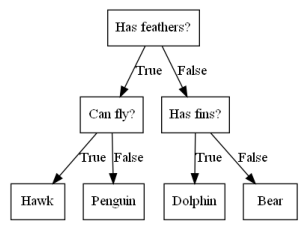

In [7]:
import os
os.environ['PATH']+= os.pathsep + 'C:/Program Files/Graphviz/bin'

mglearn.plots.plot_animal_tree()

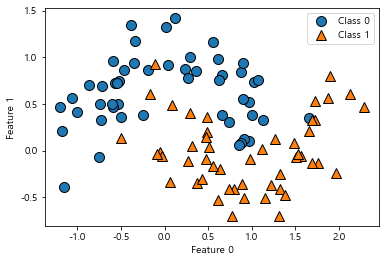

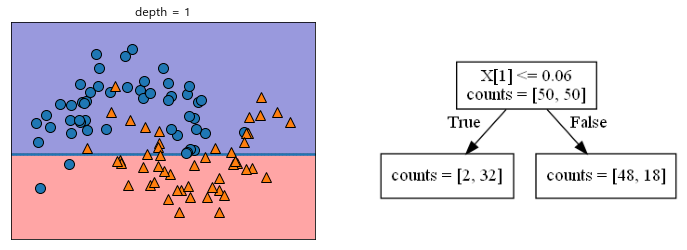

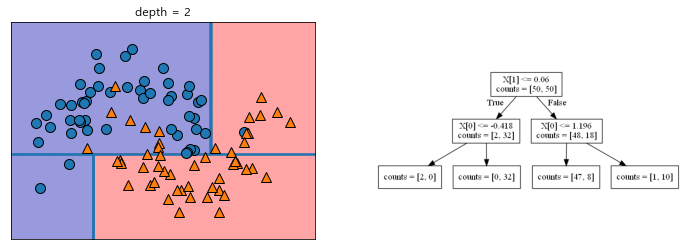

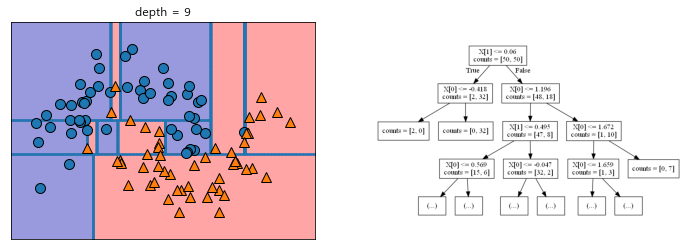

In [19]:
# 샘플 
mglearn.plots.plot_tree_progressive()

## (1) 간단한 예

In [9]:
iris = load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=11,
                                              test_size=0.2)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train,y_train)


In [12]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='data/tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names,filled=True)

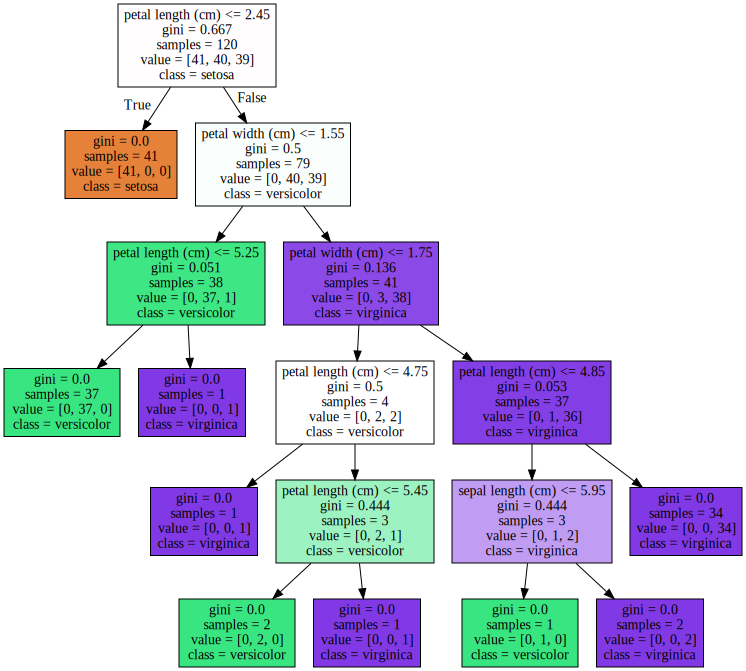

In [13]:
import graphviz
f= open('data/tree.dot')
graphviz.Source(f.read())

In [14]:
print('훈련 정확도:',dt_clf.score(X_train,y_train))
print('테스트 정확도:',dt_clf.score(X_test,y_test))

훈련 정확도: 1.0
테스트 정확도: 0.8666666666666667


### (2) 과적합 해소를 위한 복잡도 제어 : Prunning( 가지치기)
- 종류
    - 사전가지치기
    - 사후가지치기
    - sklearn에서는 사후 가지치기만 지원
- 하이퍼 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features : 다중 분류일때 주로 사용
    - max_depth
    - max_leaf_nodes
 
- 실무에서는 잘 사용안됨. --> 개선된 것을 사용함 
    - 랜덤포레스트? 

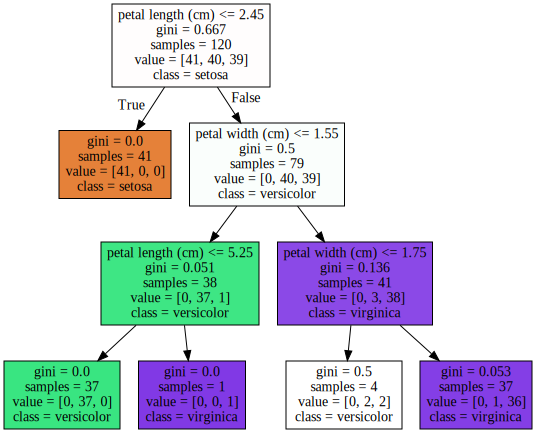

In [25]:
##### max_depth
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

# export_graphviz 는  Graphviz가 읽어들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성
export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [26]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.975
테스트 정확도 :  0.9333333333333333


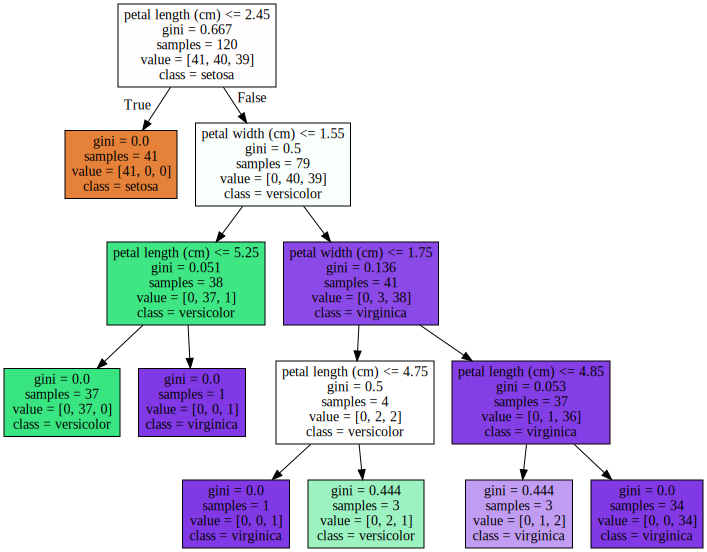

In [27]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

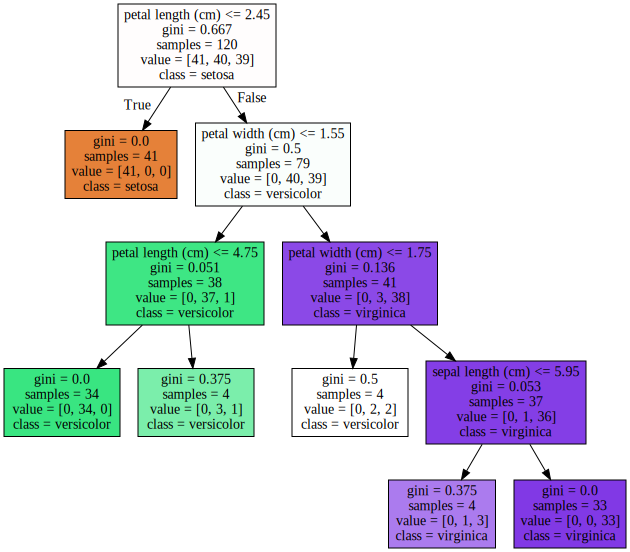

In [28]:
##### min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

### (3) 성능 개선

#### 1) 특성 중요도

In [29]:
iris = load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=11,test_size=0.2)

dt_clf = DecisionTreeClassifier(random_state=155,min_samples_leaf=4).fit(X_train,y_train)


In [30]:
#과적합을 보임 
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [33]:
dir(dt_clf)
print(dt_clf.feature_importances_)
print(iris.feature_names)
# 'petal length (cm)'의 중요도가 가장 높기 때문에 'petal length (cm)'로 나눔 

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

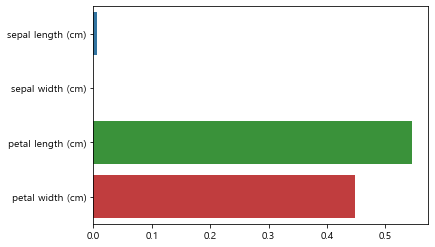

In [35]:
# 그래프 그려보기 
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

#### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때의 성능 개선 효과

In [36]:
X = iris.data[:,[2,3]]
y = iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)




In [37]:
dt_clf = DecisionTreeClassifier(random_state=155,min_samples_leaf=4).fit(X_train,y_train)
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))
# 좋은 변수만 가지고 했을 때 확실히 성능이 좋아짐.

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


#### (3) breast cancer sample
- 실제 데이터를 가지고 

In [38]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=42,stratify=cancer.target)
#stratify=

In [43]:
tree = DecisionTreeClassifier(random_state=0,max_depth=4).fit(X_train,y_train)

In [44]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


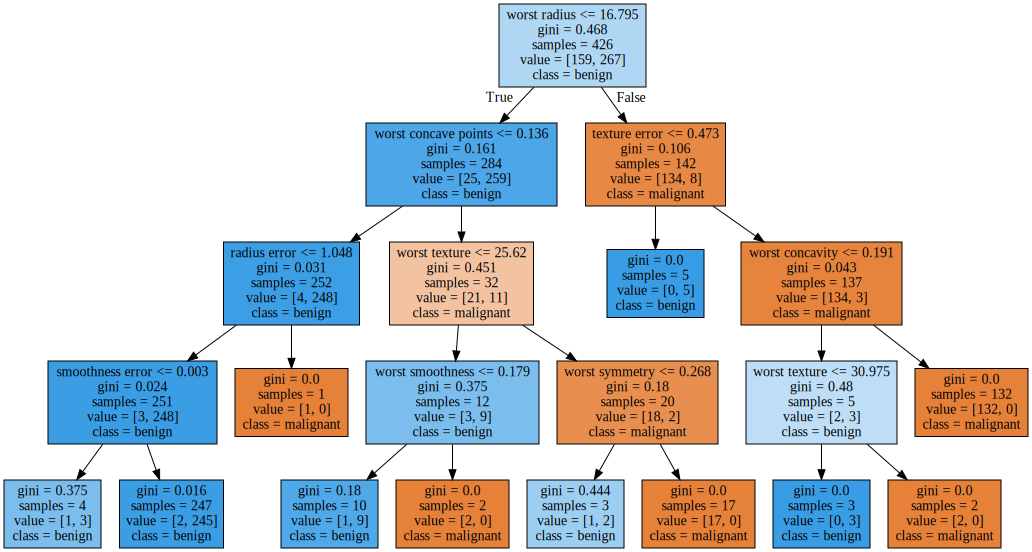

In [45]:
export_graphviz(tree, out_file="data/tree.dot", class_names=cancer.target_names,
               feature_names=cancer.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [46]:
for name, value in zip(cancer.feature_names,tree.feature_importances_):
    print(name,value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

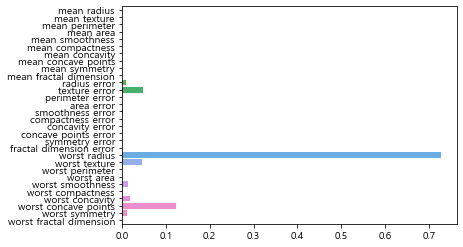

In [47]:
sns.barplot(x=tree.feature_importances_,y=cancer.feature_names)

### (4) 서울 지역 동 분류 

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강종, 강서, 강남, 강북으로 분류 

In [48]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [49]:
train_df=pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [50]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [51]:
test_df=pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [53]:
##### 현개 가지고 있는 데이터에서 레이블의 갯수 확인 
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangseo     5
Gangnam     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64
Gangseo     5
Gangnam     5
Gangdong    5
Gangbuk     5
Name: label, dtype: int64


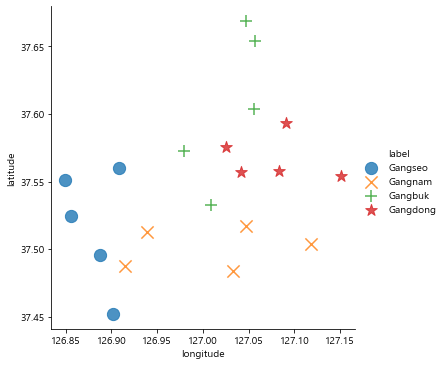

In [57]:
##### 데이터 시각화
sns.lmplot('longitude','latitude',data=train_df,fit_reg=False,hue='label',
          markers=['o','x','+','*'],scatter_kws={'s':150})

In [58]:
##### 필요없는 열 빼기(구이름,동이름)
train_df.drop(['district'],axis=1,inplace=True)
test_df.drop(['dong'],axis=1,inplace=True)

In [60]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [61]:
X_train = train_df[['latitude','longitude']]
y_train = train_df[['label']]

X_test = train_df[['latitude','longitude']]
y_test = train_df[['label']]

In [62]:
##### Label 을 숫자로 변환 
le = LabelEncoder()
y_enc = le.fit_transform(y_train)
y_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [66]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train,y_enc)

In [67]:
pred=clf.predict(X_test)
print('정확도 :',accuracy_score(y_test.values,le.classes_[pred]))

정확도 : 1.0


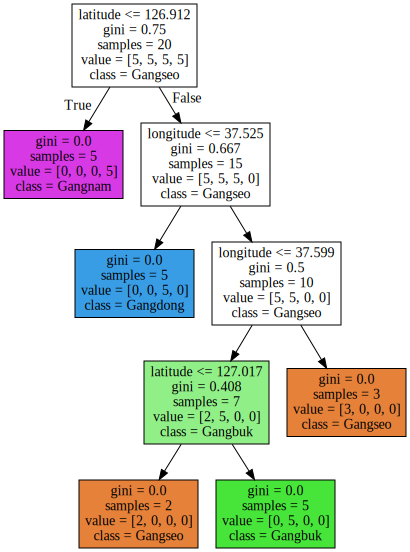

In [68]:
graph=export_graphviz(clf, out_file=None, class_names=['Gangseo','Gangbuk',
                                                       'Gangdong','Gangnam'],
               feature_names=['longitude','latitude'], filled=True)

graphviz.Source(graph)

# 2. RandomForest
- 의사결정 트리 처럼 100 개면 100개 다 하는게 아니라 여러개의 작은 나무로 쪼개는 것 
- 하나로 하는 것이 아니라 여러개로 쪼개는 것 
- 왜 성능이 더 좋으냐? --> 앙상블 방식이기 때문 여러개 알고리즘을 사용함 

### Ensemble
    - Vote 방식
        -Soft Voting : 각 한장씩 주는게 아니라 확률로 따져서 각각의 확률값으로 분할 
        - Hard Voting : a,b,c 알고리즘이 있다면 한장씩 생각하는 것 내밀면 그 갯수로 한다
        
    - 종류 
        - Voting 
            - 여러 개의 분류기가 투표를 통해 최종 예측결과를 결정하는 방식 
            - 같은 데이터 셋에서 서로 다른 알고리즘을 가진 분류기를 결합(경합을 해서 --> 투표를 통해) 
        
        - Begging(Bootstrap Aggregating)
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘을 기만
            - RandomForest
                - 짧게 여러게 , 의사결정 트리의 과대적합이 해소
        - Boosting
            -여러 개의 분류기가 순차적으로 학습을 하되, 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Lihgt GBM, Stacking

### (1) Decision Tree vs RandomForest

In [10]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)


In [11]:
model1= DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [12]:
model2= RandomForestClassifier(random_state=0,n_estimators=5).fit(X_train,y_train)
print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


In [13]:
#### 유방암 데이터 셋
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                   random_state=0,stratify=cancer.target)


In [14]:
model1= DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train,y_train)
print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.916083916083916


In [15]:
model2= RandomForestClassifier(random_state=0,n_estimators=5).fit(X_train,y_train)
print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9976525821596244
테스트 정확도 :  0.958041958041958


<AxesSubplot:>

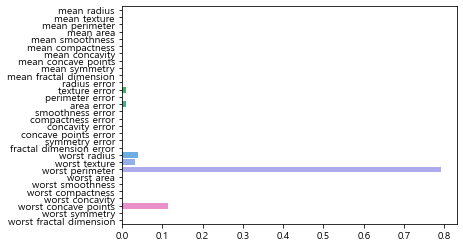

In [18]:
# 어떤 변수를 주로 사용했는가?
sns.barplot(x=model1.feature_importances_,y=cancer.feature_names)

<AxesSubplot:>

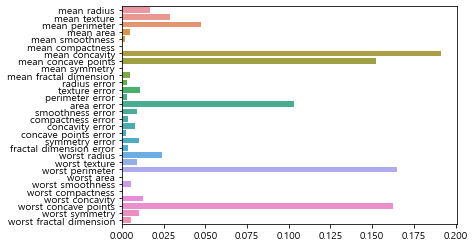

In [17]:
sns.barplot(x=model2.feature_importances_,y=cancer.feature_names)

In [25]:
##### 다중 분류 
mnist=load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [26]:
X,y = mnist.data,mnist.target

In [28]:
# 훈련만 받는게 아니라 훈련받으면서 검증까지 하는 
##### 교차 검증을 위한 공용함수 
def cross_validation(clf,features,labels):
    cv_scores=[]
    
    for i in range(10):
        scores = cross_val_score(clf,features,labels,cv=10,scoring='accuracy')
                                  # 변수, y값, 몇번 나눌 것인지, 검증은 뭘로
        cv_scores.append(scores.mean())
    return cv_scores


In [30]:
dt_cv_scores=cross_validation(DecisionTreeClassifier(),X,y)
rf_cv_scores=cross_validation(RandomForestClassifier(),X,y)

In [31]:
# 완전 기본값을 했는데도 랜덤포레스트의 정확도가 훨씬 좋음
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8282557417752947
0.9492960893854748


<AxesSubplot:>

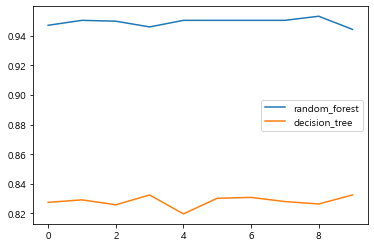

In [32]:
df = pd.DataFrame({'random_forest':rf_cv_scores,'decision_tree':dt_cv_scores})
df.plot()

### (2) 사례 1: 독버섯 데이터
- https://archive.ics.uci.edu/ml/datasets/mushroom
    - agaricus-lepiota.data
    
- 파일명을 'mushrooms.csv'


In [34]:

import urllib.request as req

savedir = 'data/mushrooms2.csv'
#네트워크에서 데이터 다운로드 하기 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url,savedir)
print('다운로드 완료')

다운로드 완료


In [36]:
mr = pd.read_csv('data/mushrooms.csv',header=None)
mr.head()
print(mr.shape)

(8124, 23)


In [38]:
##### 결측치 여부
mr.info()
mr.isnull().sum() # 결측치의 합계 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [39]:
mr.describe()
# 첫번쨰 열이 y

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [46]:
##### feature와 lable로 분리 
X=mr.iloc[:,1:]
# X = mr.drop(0,axis=1)
y= mr[0]

In [47]:
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [52]:
##### feature들의 숫자화 
# 열이 22번이니까 22번 다해줘야 하니까 반복문을 써야 함
en = LabelEncoder()
for col in X.columns:
    X[col]=en.fit_transform(X[col])

en1= LabelEncoder()
y= en1.fit_transform(y)

In [53]:
X.head()
# 값들을 머신러닝에서는 가중치를 줄 수 있으니 one-hot 인코딩을 해야함 

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [54]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
##### one hot encoding
X=pd.get_dummies(X,columns=X.columns)
X

,1_0,1_1,1_2,1_3,1_4,1_5,2_0,2_1,2_2,2_3,...,21_3,21_4,21_5,22_0,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [59]:
X.shape

(8124, 117)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [61]:
##### RandomForest

random_clf = RandomForestClassifier().fit(X_train,y_train)
pred=random_clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [62]:
##### Decision Tree
decision_clf = DecisionTreeClassifier().fit(X_train,y_train)
pred=decision_clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [63]:
##### KNN
knn_clf = KNeighborsClassifier().fit(X_train,y_train)
pred=knn_clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [66]:
##### Logistic Regression
logistic_clf = LogisticRegression().fit(X_train,y_train)
pred=logistic_clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# 3. Gradient Boosting Model

+ 랜덤포래스트에서 조금 더 성능향상 시키는 
+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성 - 랜덤 포래스트는 다 랜덤으로인 반면 얘는 트리를 무조건 만드는 것이 아니라 오차를 보완하는 방식으로 트리를 만들어 나감. 
+ 경사하강범(Gradient Descent Algorithm)을 사용 
+ learning_rate 파라미터를 사용하여 오차 보정
+ 단점은 시간이 오래 걸림 --> 이를 보완하는 모델이
    - XG Boost,Light GBM,...
+ 파라미터에 영향을 크게 받음 --> 즉 무조건 성능향상이 아님(디폴트도 랜포보다 좋은게 아님)
+ 랜덤 포레스트보다 성능을 쪼오끔이나마 올리고자

In [68]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=42)

In [69]:
? GradientBoostingClassifier

In [83]:
tree = GradientBoostingClassifier(random_state=0,max_depth=1).fit(X_train,y_train)

In [84]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [80]:
tree = GradientBoostingClassifier(random_state=0,learning_rate=0.01).fit(X_train,y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


<AxesSubplot:>

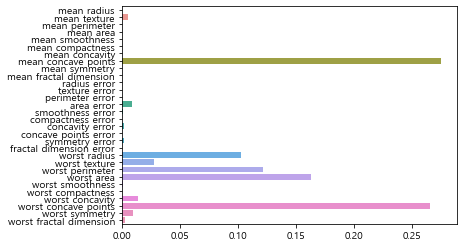

In [85]:
sns.barplot(x=tree.feature_importances_,y=cancer.feature_names)

In [87]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [88]:
##### RandomForest
clf= RandomForestClassifier(random_state=0).fit(X_train,y_train)
print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))


훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [93]:
params = {"n_estimators":[100,200,300],
          "max_depth":[2,3,4,5,6,7,8,9],
          "min_samples_leaf":[1,2,3,4,5],
          "min_samples_split":[4,8,10,11,12,13,14]}

clf2=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [95]:
print('최적의 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도 :',grid_cv.best_score_ )

최적의 파라미터 : {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 : 0.9453333333333334


In [96]:
grid_cv.score(X_test,y_test)

0.936

In [97]:
##### GradientBoosting Model
clf3 = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))



훈련 정확도 :  0.988
테스트 정확도 :  0.932


In [100]:
params = {"n_estimators":[100,200,300],
          "max_depth":[2,3,4,5,6,7,8,9],
          "min_samples_leaf":[1,2,3,4,5],
          "min_samples_split":[4,8,10,11,12,13,14]}

clf2=GradientBoostingClassifier(random_state=0)
grid_cv=GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [102]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 : ", grid_cv.score(X_test, y_test))
#### 랜덤포레스트 보다 시간이 오래 걸리긴 하지만 성능이 조금이라도 올라감

훈련 정확도 :  0.968
테스트 정확도 :  0.94


### (1) XGBoost 

+ 속도 좀 빠르게 해줄게~ 
+ 트리 기반의 앙상블 기법
+ 분류에 있어서는 다른 알고리즘보다 좋은 예측성능을 보여줌
+ XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행과 과적합 규제 부재등의 문제를 해결 
+ 병렬 CPU 환경에서 빠르게 학습 가능 
+ 독립적으로 프로그램으로 사용하던거 였음. 

#### 1) XGB Classifier

In [3]:
iris= load_iris()
X_train,X_test, y_train,y_test=train_test_split(iris.data,iris.target,test_size=.2,random_state=123)



In [4]:
#트리를 몇개 만들 것인가
xgbc=XGBClassifier(n_estimators=400,learning_rate=.1,max_depth=3).fit(X_train,y_train)

print('훈련 정확도:',xgbc.score(X_train,y_train))
print('테스트 정확도:',xgbc.score(X_test,y_test))
# 약간의 과적합이 보이는 결과가 나옴. 

[09:39:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도: 1.0
테스트 정확도: 0.9666666666666667


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

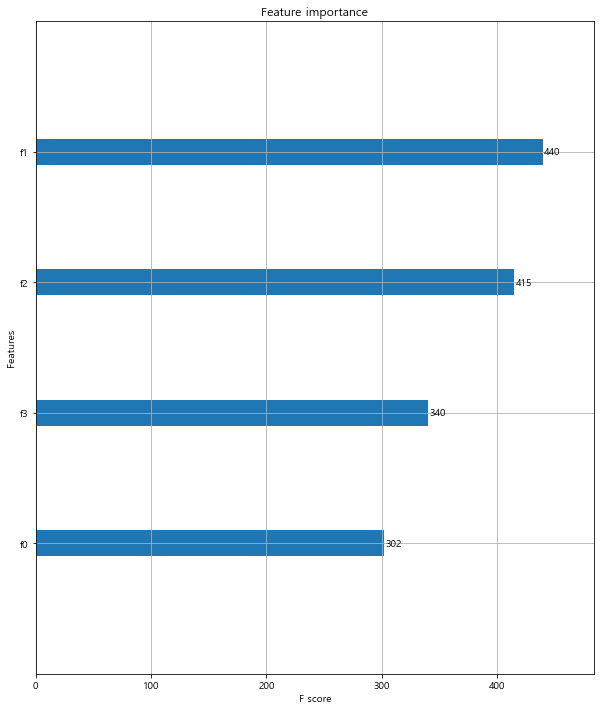

In [5]:
# 어떤 특성이 중요한지 --> 앞에서는 seaborn을 통해서 그리곤 했음. plot_importance 로도 가능 
import xgboost
fig,ax=plt.subplots(figsize=(10,12))
xgboost.plot_importance(xgbc,ax=ax) # --> 레이블이 단점이긴 함. 


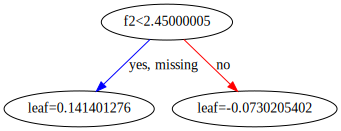

In [53]:
# tree로도 그려주는 기능이 있음. 
xgb.to_graphviz(xgbc) # --> 어떤식으로 훈련이 되었는지 알려줌. 

In [54]:
wine = load_wine()
wine.feature_names
wine.target_names
wine.data.shape

(178, 13)

In [55]:
X_train,X_test, y_train,y_test=train_test_split(wine.data,wine.target,test_size=.2,random_state=123)
xgbc=XGBClassifier(n_estimators=400,learning_rate=.1,max_depth=3).fit(X_train,y_train)

print('훈련 정확도:',xgbc.score(X_train,y_train))
print('테스트 정확도:',xgbc.score(X_test,y_test))
# 둘다 백프로? 
# 검증에 대한 적합도를 알아봐야함. 
# 훈련용 데이터만 가지고 훈련만 하지말고 따로 때서 검증 해서 cross_validate

[11:05:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도: 1.0
테스트 정확도: 1.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

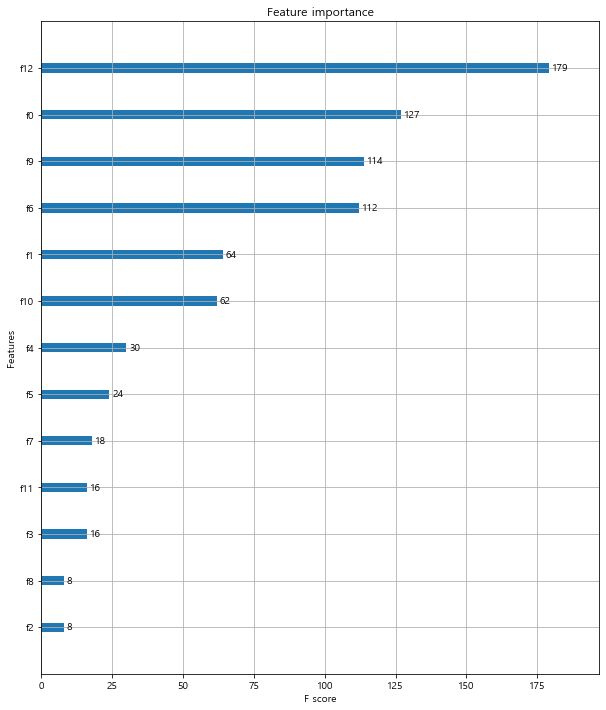

In [56]:
# 특성 중요도
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgbc,ax=ax)

In [57]:
cross_val=cross_validate(estimator=xgbc,X=wine.data,y=wine.target,cv=5)
cross_val
# 결과 값의 test_score의 평균이 점수

[11:05:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

{'fit_time': array([0.24135423, 0.18749905, 0.19547749, 0.20446253, 0.21996236]),
 'score_time': array([0.00099683, 0.00099635, 0.00099778, 0.00099277, 0.00099659]),
 'test_score': array([0.97222222, 0.91666667, 0.94444444, 0.97142857, 1.        ])}

In [58]:
print('테스트 적합도 평균 :',cross_val['test_score'].mean())
# 우연히 높게 나온거지 평균적으로 나온 적합도 점수는 아니었음. 

테스트 적합도 평균 : 0.9609523809523809


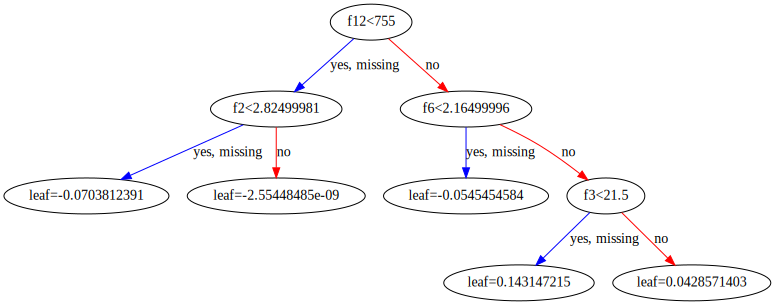

In [59]:
xgb.to_graphviz(xgbc)

#### 암데이터로 xgb해보기

In [60]:
cancer = load_breast_cancer()
X_train,X_test, y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=.2,random_state=123)
xgbc=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgbc.fit(X_train,y_train)

print('훈련 정확도:',xgbc.score(X_train,y_train))
print('테스트 정확도:',xgbc.score(X_test,y_test))

[11:05:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도: 1.0
테스트 정확도: 0.9736842105263158


In [61]:
cross_val=cross_validate(estimator=xgbc,X=cancer.data,y=cancer.target,cv=5)
cross_val

[11:05:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'fit_time': array([0.20744252, 0.21442556, 0.24434543, 0.18849564, 0.20445442]),
 'score_time': array([0.00199509, 0.00399041, 0.00199628, 0.00199461, 0.00299358]),
 'test_score': array([0.96491228, 0.96491228, 0.99122807, 0.97368421, 0.97345133])}

In [62]:
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.9736376339077782


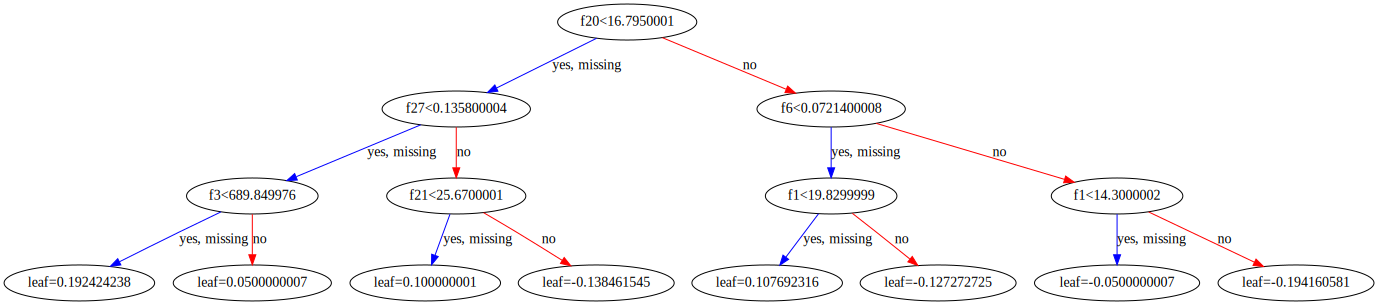

In [63]:
xgb.to_graphviz(xgbc)

#### 2) 회귀 알고리즘으로 해보기 - XGBRegressor

+ Boston Housing Sample --> 연속값이니까 선형 회귀를 써야함. 하지만 분류에서도 선형회귀를 제공함. 

In [64]:
boston = load_boston()
X_train,X_test, y_train,y_test=train_test_split(boston.data,boston.target,test_size=.2,random_state=123)

In [68]:
xgbr=XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective='reg:squarederror')
xgbr.fit(X_train,y_train)

print('훈련 정확도:',xgbr.score(X_train,y_train))
print('테스트 정확도:',xgbr.score(X_test,y_test))

훈련 정확도: 0.9972630325759281
테스트 정확도: 0.8151645284726049


In [70]:
cross_val=cross_validate(estimator=xgbr,X=boston.data,y=boston.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.6884390736705599


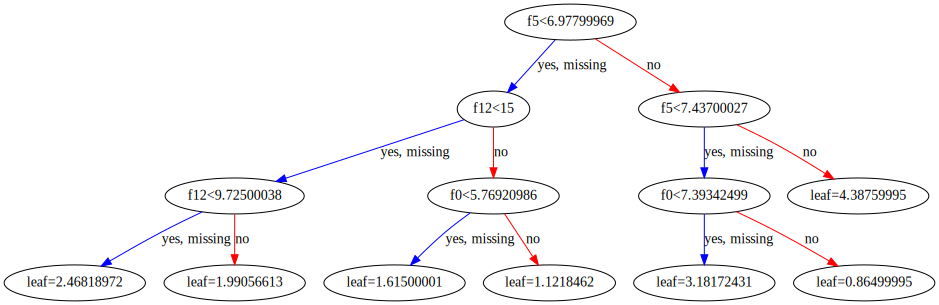

In [73]:
xgb.to_graphviz(xgbr) # 균형 잡힌 트리 

#### - 당뇨병 데이터 샘플

In [77]:
diabetes = load_diabetes()
diabetes.feature_names
diabetes.target
diabetes.data.shape

(442, 10)

In [78]:
X_train,X_test, y_train,y_test=train_test_split(diabetes.data,diabetes.target,test_size=.2,random_state=123)
xgbr=XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3,objective='reg:squarederror')
xgbr.fit(X_train,y_train)

print('훈련 정확도:',xgbr.score(X_train,y_train))
print('테스트 정확도:',xgbr.score(X_test,y_test))

훈련 정확도: 0.9679523032821651
테스트 정확도: 0.45470848778208584


In [79]:
cross_val=cross_validate(estimator=xgbr,X=diabetes.data,y=diabetes.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.30005291115066424


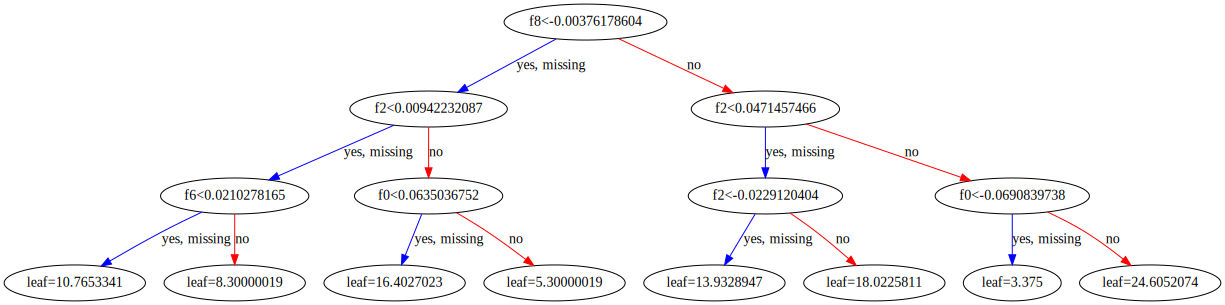

In [80]:
xgb.to_graphviz(xgbr)

### 3) LightGBM

+ 빠른 학습과 예측시간(다른 것에 비해) 
+ 더 적은 메모리 사용 
+ 범주형 특징의 자동 변환과 최적 분할 
+ 책 244~246페이지 
+ 설치 필요 pip install lightgbm


#### 1) LGBMClassifier

+ 붓꽃 데이터

In [6]:
iris = load_iris()
X_train,X_test, y_train,y_test=train_test_split(iris.data,iris.target,test_size=.2,random_state=123)
lgbrc=LGBMClassifier(n_estimators=400)
lgbrc.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
         eval_set=[(X_test,y_test)],verbose=True) # 오차값을 로그값아며


[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

LGBMClassifier(n_estimators=400)

In [88]:
print('훈련 정확도:',lgbrc.score(X_train,y_train))
print('테스트 정확도:',lgbrc.score(X_test,y_test))

훈련 정확도: 0.9833333333333333
테스트 정확도: 0.9666666666666667


In [7]:
cross_val=cross_validate(estimator=lgbrc,X=iris.data,y=iris.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.9600000000000002


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

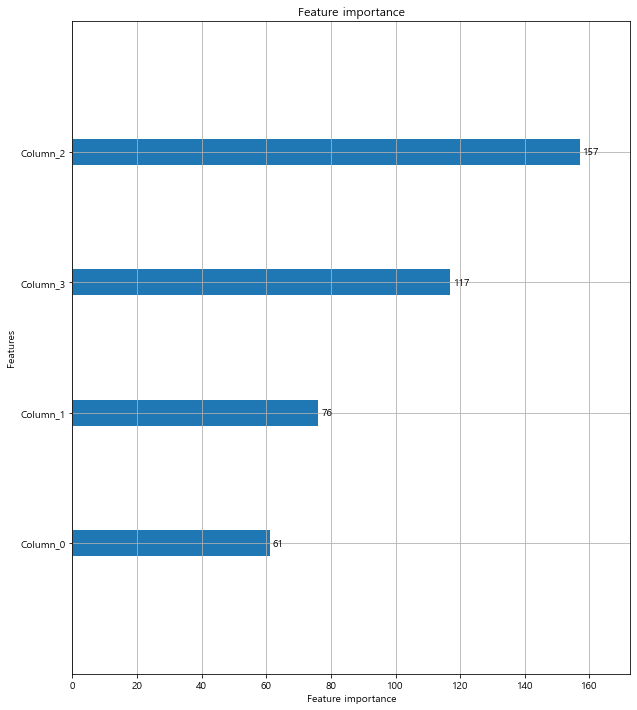

In [8]:
import lightgbm

lightgbm.plot_importance(lgbrc,figsize=(10,12)) # 나중에 추가 됬으니 나중 것으로 인식됨 그러나 구분 해주는게 좋다.

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

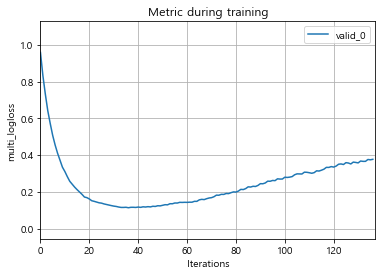

In [92]:
plot_metric(lgbrc)

<AxesSubplot:>

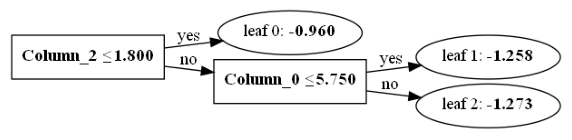

In [95]:
# 트리까지 같이 그림 
plot_tree(lgbrc,figsize=(10,12))

In [98]:
##  와인 데이터로 확인 
wine = load_wine()
X_train,X_test, y_train,y_test=train_test_split(wine.data,wine.target,test_size=.2,random_state=123)
lgbrc=LGBMClassifier(n_estimators=400)
lgbrc.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
         eval_set=[(X_test,y_test)],verbose=True) # 오차값을 로그값아며

[1]	valid_0's multi_logloss: 1.05985
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0's multi_logloss: 0.132925
[26]	valid_0's multi_logloss: 0.1251

LGBMClassifier(n_estimators=400)

In [99]:
print('훈련 정확도:',lgbrc.score(X_train,y_train))
print('테스트 정확도:',lgbrc.score(X_test,y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [104]:
cross_val=cross_validate(estimator=lgbrc,X=wine.data,y=wine.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.9776190476190475


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

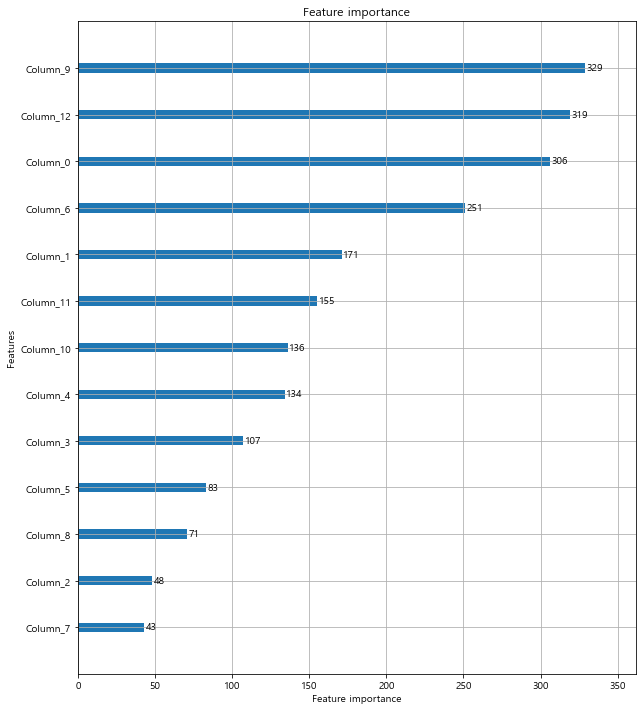

In [101]:
plot_importance(lgbrc,figsize=(10,12))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

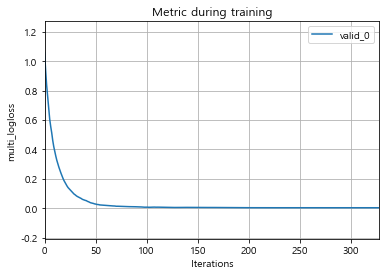

In [105]:
# 가중치 학습이 잘되어 있는지 확인 
plot_metric(lgbrc)

<AxesSubplot:>

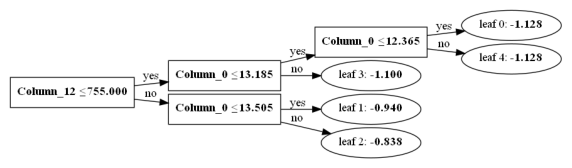

In [103]:
plot_tree(lgbrc,figsize=(10,12))

+ 유방암 데이터 셋

In [106]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=.2,random_state=123)
lgbrc=LGBMClassifier(n_estimators=400)
lgbrc.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
         eval_set=[(X_test,y_test)],verbose=True) 

[1]	valid_0's binary_logloss: 0.575665
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_logloss: 0.119348
[25]	valid_0's binary_logloss: 0.114732
[26]	vali

LGBMClassifier(n_estimators=400)

In [107]:
print('훈련 정확도:',lgbrc.score(X_train,y_train))
print('테스트 정확도:',lgbrc.score(X_test,y_test))

훈련 정확도: 1.0
테스트 정확도: 0.9736842105263158


In [110]:
cross_val=cross_validate(estimator=lgbrc,X=cancer.data,y=cancer.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

테스트 적합도 평균 : 0.9736531594472908


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

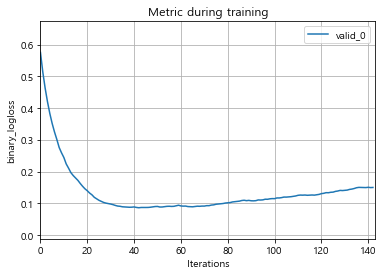

In [109]:
plot_metric(lgbrc)

### 2) LGBMRegressor
+ 보스턴 샘플


In [122]:
boston = load_boston()
X_train,X_test, y_train,y_test=train_test_split(boston.data,boston.target,test_size=.2,random_state=123)
lgbr=LGBMRegressor(n_estimators=400)
lgbr.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
         eval_set=[(X_test,y_test)],verbose=True)

print('훈련 정확도:',lgbr.score(X_train,y_train))
print('테스트 정확도:',lgbr.score(X_test,y_test))

cross_val=cross_validate(estimator=lgbr,X=boston.data,y=boston.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2: 22.6387
[37]	valid_0's l2: 22.4443
[38]	valid_0's l

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

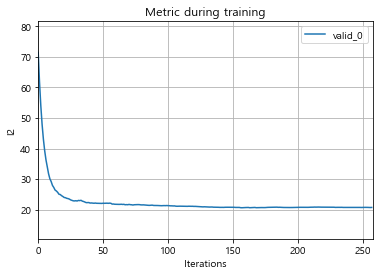

In [123]:
plot_metric(lgbr)

+ 당뇨 샘플

In [119]:
diabetes = load_diabetes()
X_train,X_test, y_train,y_test=train_test_split(diabetes.data,diabetes.target,test_size=.2,random_state=123)
lgbr=LGBMRegressor(n_estimators=400)
lgbr.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
         eval_set=[(X_test,y_test)],verbose=True)

print('훈련 정확도:',lgbr.score(X_train,y_train))
print('테스트 정확도:',lgbr.score(X_test,y_test))

cross_val=cross_validate(estimator=lgbr,X=diabetes.data,y=diabetes.target,cv=5)
print('테스트 적합도 평균 :',cross_val['test_score'].mean())

[1]	valid_0's l2: 5692.17
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36]	valid_0's l2: 2573.21
[37]	valid_0's l2: 2562.82
[38]	valid_0

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

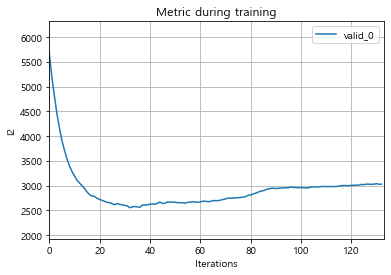

In [121]:
plot_metric(lgbr)

# 4. Voting Classifier 

In [124]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                   random_state=123,test_size=.2)

In [147]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
# 여러가지 분류 알고리즘을 넣어 줘도 됨

In [148]:
#이미 만들어진 알고리즘을 모아주는 
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
# hard --> 다 나눠주고,soft --> 많이 나온 확률

In [149]:
vo_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [150]:
# score로 확인해도 되는데 
# 예측값으로 정확도를 살펴보자 
pred = vo_clf.predict(X_test)
print('정확도 : ',accuracy_score(y_test,pred)) # 정답과 비교했을 때 

정확도 :  0.9736842105263158


In [153]:
# 각각의 알고리즘이 어떤 성능을 냈을까? 
classifiers = [lr_clf,knn_clf]

for clf in classifiers:
    clf.fit(X_train,y_train)
    preds = clf.predict(X_test) # 각각 따로 돌려보기 
    
    class_name = clf.__class__.__name__
    print('{} 정확도 : {}'.format(class_name,accuracy_score(y_test,preds)))

LogisticRegression 정확도 : 0.9824561403508771
KNeighborsClassifier 정확도 : 0.9649122807017544
